In [1]:
import pandas as pd          # tables and data handling
import numpy as np           # numbers and math
import matplotlib.pyplot as plt  # charts

print("Libraries ready")

Libraries ready


In [2]:
import pandas as pd

# Load raw files (since your notebook is inside retail_project, no folder name needed)
sales = pd.read_csv("sales.csv")
products = pd.read_csv("products.csv")
stores = pd.read_csv("stores.csv")
customers = pd.read_csv("customers.csv")
holidays = pd.read_csv("uae_holidays.csv")

# Quick check: see first few rows of each file
print("Sales data:")
display(sales.head())

print("\nProducts data:")
display(products.head())

print("\nStores data:")
display(stores.head())

print("\ncustomers data:")
display(customers.head())

print("\nHolidays data:")
display(holidays.head())

Sales data:


,order_id,order_date,store_id,customer_id,product_id,qty,unit_price,promo_code,line_total,payment_method
0,300001,2024-01-01,201,5067,1009,1,36.48,WELCOME10,32.83,Card
1,300002,2024-01-01,201,5065,1019,1,51.61,NaN,51.61,Card
2,300003,2024-01-01,202,5033,1012,1,44.49,NaN,44.49,Tabby
3,300004,2024-01-01,204,5040,1009,1,35.1,WEEKEND5,33.34,Tabby
4,300005,2024-01-01,201,5074,1007,1,34.26,NaN,34.26,Tabby



Products data:


,product_id,product_name,category,brand
0,1001,Aloe Hydrating Gel 100ml,Skincare,DermaGlow
1,1002,Vitamin C Serum 30ml,Skincare,DermaGlow
2,1003,Retinol Cream 50ml,Skincare,DermaGlow
3,1004,Sunscreen SPF50 50ml,Skincare,SunGuard
4,1005,Hyaluronic Acid 2% 30ml,SKINCARE,DermaGlow



Stores data:


,store_id,store_name,city,region
0,201,Dubai Mall,Dubai,DXB
1,202,Mall of the Emirates,Dubai,DXB
2,203,Abu Dhabi Galleria,Abu Dhabi,AUH
3,204,Sharjah City Center,Sharjah,SHJ



customers data:


,customer_id,gender,age,loyalty_tier
0,5001,F,29,Gold
1,5002,M,27,Silver
2,5003,M,29,Silver
3,5004,F,18,Silver
4,5005,F,27,None



Holidays data:


,date,holiday
0,2024-04-10,1
1,2024-04-11,1
2,2024-06-16,1
3,2024-06-17,1
4,2024-12-02,1


# Inspection
## Sales

In [7]:
sales.shape

(61091, 10)

- this means we have 61,091 rows and 10 columns meaning we are dealing with a very big dataset

In [8]:
sales.columns

Index(['order_id', 'order_date', 'store_id', 'customer_id', 'product_id',
       'qty', 'unit_price', 'promo_code', 'line_total', 'payment_method'],
      dtype='object')

- confirms which fields (columns) we have

In [9]:
sales.head()

,order_id,order_date,store_id,customer_id,product_id,qty,unit_price,promo_code,line_total,payment_method
0,300001,2024-01-01,201,5067,1009,1,36.48,WELCOME10,32.83,Card
1,300002,2024-01-01,201,5065,1019,1,51.61,NaN,51.61,Card
2,300003,2024-01-01,202,5033,1012,1,44.49,NaN,44.49,Tabby
3,300004,2024-01-01,204,5040,1009,1,35.1,WEEKEND5,33.34,Tabby
4,300005,2024-01-01,201,5074,1007,1,34.26,NaN,34.26,Tabby


In [10]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61091 entries, 0 to 61090
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        61091 non-null  int64  
 1   order_date      61091 non-null  object 
 2   store_id        61091 non-null  int64  
 3   customer_id     61091 non-null  int64  
 4   product_id      61091 non-null  int64  
 5   qty             61091 non-null  int64  
 6   unit_price      61091 non-null  object 
 7   promo_code      14925 non-null  object 
 8   line_total      61091 non-null  float64
 9   payment_method  59838 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 4.7+ MB


- order date is still object type (string), needs to be converted to datetime
- unit price is object (should be float)
- promocode and payment method are categorical

In [12]:
sales.isnull().sum()

order_id              0
order_date            0
store_id              0
customer_id           0
product_id            0
qty                   0
unit_price            0
promo_code        46166
line_total            0
payment_method     1253
dtype: int64

- promo_code 46k missing (normal, not everyone uses promos).
- payment_method → ~1.2k missing (that’s a problem: might be data entry errors)
  - we need to decide Keep NaN for promocode (expected)
  - investigate / fill / drop /for payment method

In [13]:
sales.describe()

,order_id,store_id,customer_id,product_id,qty,line_total
count,61091.000000,61091.000000,61091.000000,61091.000000,61091.000000,61091.000000
mean,330484.808450,202.498830,5050.529161,1013.530324,1.365766,66.065030
std,17601.869052,1.120215,28.870492,7.499199,0.672763,41.269667
min,300001.000000,201.000000,5001.000000,1001.000000,-4.000000,-280.550000
25%,315240.500000,201.000000,5026.000000,1007.000000,1.000000,39.890000
50%,330489.000000,203.000000,5050.000000,1014.000000,1.000000,53.230000
75%,345724.500000,204.000000,5076.000000,1020.000000,2.000000,81.105000
max,360970.000000,204.000000,5100.000000,1026.000000,5.000000,362.700000


### This is where analysis begins:

- qty: min is -4 (⚠️ impossible, means bad data entry → needs fixing).
- line_total: min is -280.55 (⚠️ also impossible).
- qty max = 5 → realistic, small purchases.
- line_total max = 362 → seems okay for skincare.
- Average transaction value (mean line_total) ≈ 66.

### Insights:
- Data has errors (negative sales).
- On average, people spend about 66 per order.
- Most customers buy 1–2 items per order.

## Products

In [10]:
products.shape

(26, 4)

26 rows and 4 columns

In [11]:
products.columns

Index(['product_id', 'product_name', 'category', 'brand'], dtype='object')

In [33]:
products.head()

,product_id,product_name,category,brand
0,1001,Aloe Hydrating Gel 100ml,Skincare,DermaGlow
1,1002,Vitamin C Serum 30ml,Skincare,DermaGlow
2,1003,Retinol Cream 50ml,Skincare,DermaGlow
3,1004,Sunscreen SPF50 50ml,Skincare,SunGuard
4,1005,Hyaluronic Acid 2% 30ml,SKINCARE,DermaGlow


Shows the first 5 rows:
- product_id looks sequential (1001, 1002, 1003…)
- product_name gives names + sizes (e.g., “Aloe Hydrating Gel 100ml”)
- category has some inconsistencies (notice: Skincare, SKINCARE, Bodycare, HAIRCARE, GROOMING) → problem we’ll need to fix later. 
- brand looks like company names, e.g., DermaGlow, PureClean, etc.

category column needs cleaning (inconsistent capitalization).

In [34]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    26 non-null     int64 
 1   product_name  26 non-null     object
 2   category      26 non-null     object
 3   brand         26 non-null     object
dtypes: int64(1), object(3)
memory usage: 960.0+ bytes


- Non-Null Count is 26 for every column → means no missing values.
  - Dtype (data types):
  - product_id → int64 (numeric)
  - others → object (strings/text).

This is expected and clean. No problems here.

In [14]:
products.isnull().sum()

product_id      0
product_name    0
category        0
brand           0
dtype: int64

Zero missing values across all columns.

In [35]:
products.describe()

,product_id
count,26.000000
mean,1013.500000
std,7.648529
min,1001.000000
25%,1007.250000
50%,1013.500000
75%,1019.750000
max,1026.000000


Basically confirms IDs are sequential, no missing product_id values.

## Stores

In [15]:
stores.shape

(4, 4)

In [16]:
stores.columns

Index(['store_id', 'store_name', 'city', 'region'], dtype='object')

In [36]:
stores.head()

,store_id,store_name,city,region
0,201,Dubai Mall,Dubai,DXB
1,202,Mall of the Emirates,Dubai,DXB
2,203,Abu Dhabi Galleria,Abu Dhabi,AUH
3,204,Sharjah City Center,Sharjah,SHJ


In [37]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   store_id    4 non-null      int64 
 1   store_name  4 non-null      object
 2   city        4 non-null      object
 3   region      4 non-null      object
dtypes: int64(1), object(3)
memory usage: 256.0+ bytes


In [19]:
stores.isnull().sum()

store_id      0
store_name    0
city          0
region        0
dtype: int64

In [38]:
stores.describe()

,store_id
count,4.000000
mean,202.500000
std,1.290994
min,201.000000
25%,201.750000
50%,202.500000
75%,203.250000
max,204.000000


The stores dataset is very clean and simple: 4 unique stores, no missing data, identifiers are consistent.

## Customers

In [24]:
customers.shape

(100, 4)

In [28]:
customers.columns

Index(['customer_id', 'gender', 'age', 'loyalty_tier'], dtype='object')

In [39]:
customers.head()

,customer_id,gender,age,loyalty_tier
0,5001,F,29,Gold
1,5002,M,27,Silver
2,5003,M,29,Silver
3,5004,F,18,Silver
4,5005,F,27,None


In [40]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   100 non-null    int64 
 1   gender        100 non-null    object
 2   age           100 non-null    int64 
 3   loyalty_tier  100 non-null    object
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [31]:
customers.isnull().sum()

customer_id     0
gender          0
age             0
loyalty_tier    0
dtype: int64

In [41]:
customers.describe()

,customer_id,age
count,100.000000,100.000000
mean,5050.500000,28.480000
std,29.011492,5.407589
min,5001.000000,18.000000
25%,5025.750000,24.000000
50%,5050.500000,29.000000
75%,5075.250000,31.250000
max,5100.000000,43.000000


Customers dataset is also clean. It’s a young demographic (18–43), evenly distributed across loyalty tiers.

## holidays

In [3]:
holidays.shape

(8, 2)

In [5]:
holidays.columns

Index(['date', 'holiday'], dtype='object')

In [6]:
holidays.head()

,date,holiday
0,2024-04-10,1
1,2024-04-11,1
2,2024-06-16,1
3,2024-06-17,1
4,2024-12-02,1


In [7]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     8 non-null      object
 1   holiday  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [8]:
holidays.isnull().sum()

date       0
holiday    0
dtype: int64

In [9]:
holidays.describe()

,holiday
count,8.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


- The dataset is essentially a holiday calendar with only dates.
- The holiday column is redundant, since every row = 1.
- The real value here is in the date column—you can enrich it by extracting year, month, day, weekday, etc., and use it to analyze whether sales change on holidays.

## Cleaning & Standardizing

Products Clean

In [3]:
# Make working copies so raw data stays unchanged
sales_clean     = sales.copy()
products_clean  = products.copy()
stores_clean    = stores.copy()
customers_clean = customers.copy()
holidays_clean  = holidays.copy()

print("Copies made:", len(sales_clean), len(products_clean), len(stores_clean), len(customers_clean), len(holidays_clean))

Copies made: 61091 26 4 100 8


In [4]:
# Standardize text formatting in products
products_clean['category'] = products_clean['category'].str.strip().str.title()
products_clean['brand']    = products_clean['brand'].str.strip().str.title()

# Quick check
print(products_clean['category'].unique())
print(products_clean['brand'].unique())

['Skincare' 'Bodycare' 'Haircare' 'Grooming']
['Dermaglow' 'Sunguard' 'Pureclean' 'Bodysoft' 'Hairlux' 'Groompro']


Why: Category/brand values had mixed casing (e.g., “SKINCARE” vs “Skincare”). This breaks grouping and charts because the same thing is counted as different labels. I trimmed spaces and applied a consistent Title Case so aggregations are correct and visuals are clean.

Holidays clean

In [5]:
# HOLIDAYS — convert to real dates, drop constant column, add helpers
holidays_clean['date'] = pd.to_datetime(holidays_clean['date'], errors='coerce')
holidays_clean = holidays_clean.drop(columns=['holiday'])  # all 1s, not informative
holidays_clean = holidays_clean.dropna(subset=['date']).drop_duplicates()

# optional helpers for later analysis
holidays_clean['year']     = holidays_clean['date'].dt.year
holidays_clean['month']    = holidays_clean['date'].dt.month
holidays_clean['day_name'] = holidays_clean['date'].dt.day_name()

# preview
holidays_clean.head()

,date,year,month,day_name
0,2024-04-10,2024,4,Wednesday
1,2024-04-11,2024,4,Thursday
2,2024-06-16,2024,6,Sunday
3,2024-06-17,2024,6,Monday
4,2024-12-02,2024,12,Monday


i need date in datetime format to join with sales and build time features. The holiday column was constant (=1) so it added no information and I removed it. I also added year/month/weekday so I can analyze seasonality and holiday effects quickly.

Stores Clean

In [6]:
# STORES — tidy casing and spaces
for col in ['store_name','city','region']:
    stores_clean[col] = stores_clean[col].astype(str).str.strip()

stores_clean['store_name'] = stores_clean['store_name'].str.title()
stores_clean['city']       = stores_clean['city'].str.title()
stores_clean['region']     = stores_clean['region'].str.upper()

# drop exact duplicates (defensive)
before = len(stores_clean)
stores_clean = stores_clean.drop_duplicates(subset=['store_id'])
print('Store duplicates removed:', before - len(stores_clean))

Store duplicates removed: 0


Store names and regions must be consistent to avoid duplicate group labels like “dxb” vs “DXB”. I standardized casing (Title Case for names/cities, UPPER for region) and removed any duplicate store rows by store_id.

Customers Clean

In [7]:
# CUSTOMERS — standardize text and validate ranges
customers_clean['gender']       = customers_clean['gender'].astype(str).str.strip().str.upper()
customers_clean['loyalty_tier'] = customers_clean['loyalty_tier'].astype(str).str.strip().str.title()

# enforce allowed values
customers_clean['gender'] = customers_clean['gender'].where(customers_clean['gender'].isin(['F','M']), 'U')
allowed_tiers = {'None','Silver','Gold','Platinum'}
customers_clean['loyalty_tier'] = customers_clean['loyalty_tier'].where(
    customers_clean['loyalty_tier'].isin(allowed_tiers), 'None'
)

# keep ages in a realistic range
customers_clean['age'] = customers_clean['age'].clip(lower=16, upper=90)

# quick checks
customers_clean[['gender','loyalty_tier']].head()
customers_clean['age'].describe()

count    100.000000
mean      28.480000
std        5.407589
min       18.000000
25%       24.000000
50%       29.000000
75%       31.250000
max       43.000000
Name: age, dtype: float64

Categorical fields like gender and loyalty tier must be consistent for accurate counts. I standardized casing and enforced allowed values. I also clipped extreme ages to a realistic range to prevent outliers from skewing averages.

Sales Clean

In [8]:
# SALES — 1) remove exact duplicates
before = len(sales_clean)
sales_clean = sales_clean.drop_duplicates()
print('Sales duplicates removed:', before - len(sales_clean))

# 2) parse dates
sales_clean['order_date'] = pd.to_datetime(sales_clean['order_date'], errors='coerce')

# 3) clean unit_price text → float
sales_clean['unit_price'] = (
    sales_clean['unit_price'].astype(str)
        .str.replace('AED','', regex=False)
        .str.replace(',','', regex=False)
        .str.strip()
        .replace('', pd.NA)
)
sales_clean['unit_price'] = pd.to_numeric(sales_clean['unit_price'], errors='coerce')

# 4) handle text nulls
sales_clean['promo_code']     = sales_clean['promo_code'].fillna('NONE')
sales_clean['payment_method'] = sales_clean['payment_method'].fillna('Unknown')

# 5) quantity → int, flag returns
sales_clean['qty']       = pd.to_numeric(sales_clean['qty'], errors='coerce').fillna(0).astype(int)
sales_clean['is_return'] = (sales_clean['qty'] < 0).astype(int)
sales_clean['abs_qty']   = sales_clean['qty'].abs()

# 6) compute clean net revenue with discount map
discount_map = {'NONE':0.00, 'WELCOME10':0.10, 'WEEKEND5':0.05, 'BUNDLE15':0.15}
sales_clean['discount_rate'] = sales_clean['promo_code'].map(discount_map).fillna(0.0)

sales_clean['gross_revenue'] = sales_clean['abs_qty'] * sales_clean['unit_price']
sales_clean['net_revenue']   = sales_clean['gross_revenue'] * (1 - sales_clean['discount_rate'])
sales_clean.loc[sales_clean['is_return'] == 1, 'net_revenue'] *= -1

# 7) drop rows unusable for analysis (missing critical fields)
bad = sales_clean['order_date'].isna() | sales_clean['unit_price'].isna()
print('Dropped rows missing date or unit_price:', bad.sum())
sales_clean = sales_clean.loc[~bad].reset_index(drop=True)

# 8) foreign-key checks — IDs should exist in dimension tables
fk_bad_prod  = ~sales_clean['product_id'].isin(products_clean['product_id'])
fk_bad_store = ~sales_clean['store_id'].isin(stores_clean['store_id'])
fk_bad_cust  = ~sales_clean['customer_id'].isin(customers_clean['customer_id'])
to_drop = fk_bad_prod | fk_bad_store | fk_bad_cust
print('Dropped invalid ID rows:', to_drop.sum())
sales_clean = sales_clean.loc[~to_drop].reset_index(drop=True)

# peek
sales_clean[['order_date','product_id','store_id','customer_id','qty','unit_price','promo_code','net_revenue']].head()

Sales duplicates removed: 102
Dropped rows missing date or unit_price: 0
Dropped invalid ID rows: 0


,order_date,product_id,store_id,customer_id,qty,unit_price,promo_code,net_revenue
0,2024-01-01,1009,201,5067,1,36.48,WELCOME10,32.832
1,2024-01-01,1019,201,5065,1,51.61,NONE,51.610
2,2024-01-01,1012,202,5033,1,44.49,NONE,44.490
3,2024-01-01,1009,204,5040,1,35.10,WEEKEND5,33.345
4,2024-01-01,1007,201,5074,1,34.26,NONE,34.260


Sales is the fact table used for KPIs. I:
- Removed duplicate rows to prevent double counting.
- Parsed order_date and cleaned unit_price to numeric so math works.
- Standardized promo_code/payment_method missing values.
- Flagged returns (negative qty) and computed a reliable net_revenue using a clear discount map.
- Dropped rows missing critical fields (date/price) and any rows with product/store/customer IDs not found in the reference tables, to avoid broken joins and incorrect totals.

# Analysis-ready table

In [9]:
# Join product info
sales_enriched = sales_clean.merge(
    products_clean[['product_id','product_name','category','brand']],
    on='product_id', how='left'
)

# Join store info
sales_enriched = sales_enriched.merge(
    stores_clean[['store_id','store_name','city','region']],
    on='store_id', how='left'
)

# Add holiday flag (left join keeps all sales)
sales_enriched = sales_enriched.merge(
    holidays_clean[['date']].rename(columns={'date':'order_date'}).assign(is_holiday=1),
    on='order_date', how='left'
)
sales_enriched['is_holiday'] = sales_enriched['is_holiday'].fillna(0).astype(int)

# time helpers
sales_enriched['order_month'] = sales_enriched['order_date'].values.astype('datetime64[M]')
sales_enriched['weekday']     = sales_enriched['order_date'].dt.day_name()

sales_enriched.head()

,order_id,order_date,store_id,customer_id,product_id,qty,unit_price,promo_code,line_total,payment_method,...,net_revenue,product_name,category,brand,store_name,city,region,is_holiday,order_month,weekday
0,300001,2024-01-01,201,5067,1009,1,36.48,WELCOME10,32.83,Card,...,32.832,Micellar Water 400ml,Skincare,Pureclean,Dubai Mall,Dubai,DXB,0,2024-01-01,Monday
1,300002,2024-01-01,201,5065,1019,1,51.61,NONE,51.61,Card,...,51.610,Beard Oil 30ml,Grooming,Groompro,Dubai Mall,Dubai,DXB,0,2024-01-01,Monday
2,300003,2024-01-01,202,5033,1012,1,44.49,NONE,44.49,Tabby,...,44.490,Clay Mask 75ml,Skincare,Pureclean,Mall Of The Emirates,Dubai,DXB,0,2024-01-01,Monday
3,300004,2024-01-01,204,5040,1009,1,35.10,WEEKEND5,33.34,Tabby,...,33.345,Micellar Water 400ml,Skincare,Pureclean,Sharjah City Center,Sharjah,SHJ,0,2024-01-01,Monday
4,300005,2024-01-01,201,5074,1007,1,34.26,NONE,34.26,Tabby,...,34.260,Cleansing Balm 90g,Skincare,Pureclean,Dubai Mall,Dubai,DXB,0,2024-01-01,Monday


 I created one analysis-ready table by joining product, store, and holiday context to each sale. This enables grouping by category/brand, region/city, and holiday vs non‑holiday without repeated joins later.

In [10]:
import os
os.makedirs('output', exist_ok=True)
products_clean.to_csv('output/products_clean.csv',   index=False)
stores_clean.to_csv('output/stores_clean.csv',       index=False)
customers_clean.to_csv('output/customers_clean.csv', index=False)
holidays_clean.to_csv('output/holidays_clean.csv',   index=False)
sales_enriched.to_csv('output/sales_enriched.csv',   index=False)
print('Saved cleaned datasets to ./output/')

Saved cleaned datasets to ./output/


Saving cleaned datasets makes the project reproducible and professional. Anyone can reload these “ready” files to compute KPIs and build dashboards without re-running all the cleaning.

# KPI Calculations

In [14]:
df_sales = sales_enriched if 'sales_enriched' in globals() else sales_clean

# 1) Total Revenue
total_revenue = df_sales['net_revenue'].sum()
print("Total Revenue:", round(total_revenue, 2))

# 2) Average Transaction Value (Average Basket)
avg_basket = df_sales['net_revenue'].mean()
print("Average Basket Size:", round(avg_basket, 2))

# 3) Total Units Sold
total_units = df_sales['qty'].sum()
print("Total Units Sold:", int(total_units))

# 4) Average Units per Transaction
avg_units_per_txn = df_sales['qty'].mean()
print("Average Units per Transaction:", round(avg_units_per_txn, 2))

# 5) Revenue by Category (needs sales_enriched with 'category')
if 'category' in df_sales.columns:
    revenue_by_category = (df_sales.groupby('category')['net_revenue']
                           .sum()
                           .sort_values(ascending=False))
    print("\nRevenue by Category:\n", revenue_by_category)
else:
    print("\nRevenue by Category: build 'sales_enriched' first (join products).")

# 6) Top 5 Products by Revenue (needs product_name)
if 'product_name' in df_sales.columns:
    top_products = (df_sales.groupby('product_name')['net_revenue']
                    .sum()
                    .sort_values(ascending=False)
                    .head(5))
    print("\nTop 5 Products by Revenue:\n", top_products)
else:
    print("\nTop 5 Products: build 'sales_enriched' first (join products).")

Total Revenue: 4031142.91
Average Basket Size: 66.1
Total Units Sold: 83301
Average Units per Transaction: 1.37

Revenue by Category:
 category
Skincare    2.951540e+06
Haircare    4.599775e+05
Grooming    3.372481e+05
Bodycare    2.823776e+05
Name: net_revenue, dtype: float64

Top 5 Products by Revenue:
 product_name
Ceramide Moisturizer 50ml    261367.6615
Night Repair Cream 50ml      252915.1565
Moisturizer Gel 50ml         243854.3155
AHA Serum 30ml               236806.6870
BHA Serum 30ml               229947.9900
Name: net_revenue, dtype: float64


- Use net_revenue because it reflects discounts and returns; it’s the right measure for business KPIs.
- Use qty for volume metrics.
- Use sales_enriched for category/product breakdowns since it contains the joined context (category, brand, store, holiday).

# Time Based Analysis

### Monthly Revenue Trend

In [15]:
monthly_revenue = (sales_enriched
                   .groupby('order_month')['net_revenue']
                   .sum())

print(monthly_revenue)

order_month
2024-01-01    211797.5785
2024-02-01    207082.1720
2024-03-01    216636.3845
2024-04-01    208949.3620
2024-05-01    218612.7220
2024-06-01    193583.2535
2024-07-01    192292.0495
2024-08-01    199149.8095
2024-09-01    202759.9295
2024-10-01    207871.1950
2024-11-01    270316.6155
2024-12-01    265077.1985
2025-01-01    203002.2945
2025-02-01    196384.7750
2025-03-01    222575.1495
2025-04-01    197858.0275
2025-05-01    226089.9180
2025-06-01    189281.4780
2025-07-01    187587.9075
2025-08-01      2817.8770
2025-09-01      2927.2070
2025-10-01      3313.2350
2025-11-01      2204.9380
2025-12-01      2971.8295
Name: net_revenue, dtype: float64


Businesses need to know if revenue is growing, seasonal, or declining.

### Revenue by Weekday

In [16]:
weekday_revenue = (sales_enriched
                   .groupby('weekday')['net_revenue']
                   .sum()
                   .reindex(
                       ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
                   ))
print(weekday_revenue)

weekday
Monday       402831.1880
Tuesday      428118.0895
Wednesday    452876.9140
Thursday     492312.2520
Friday       654931.0635
Saturday     952331.3095
Sunday       647742.0900
Name: net_revenue, dtype: float64


Shows which days customers spend most, useful for staffing/promotions.

### Holiday vs Non-Holiday Sales

In [17]:
holiday_sales = (sales_enriched
                 .groupby('is_holiday')['net_revenue']
                 .sum())
holiday_sales.index = holiday_sales.index.map({0:'Non-Holiday',1:'Holiday'})
print(holiday_sales)

is_holiday
Non-Holiday    3.980588e+06
Holiday        5.055522e+04
Name: net_revenue, dtype: float64


Tests if promotions/holidays really boost revenue.

# Customer Segmentation & Behavior Analysis

In [18]:
customer_revenue = (sales_enriched
                    .groupby('customer_id')
                    ['net_revenue'].sum()
                    .reset_index())

repeat_customers = sales_enriched[sales_enriched.duplicated('customer_id')]
new_vs_repeat = sales_enriched.groupby(sales_enriched['customer_id'].duplicated())['net_revenue'].sum()
print(new_vs_repeat)

customer_id
False    7.630451e+03
True     4.023512e+06
Name: net_revenue, dtype: float64


Repeat vs. New Customers

- Measure how much revenue comes from new customers vs. returning customers.

Justification: This helps businesses know if growth is coming from loyal customers or new acquisition.

### Customer Lifetime Value (CLV) Approximation

- Look at average revenue per customer across the dataset.

Justification: Indicates how valuable an average customer is, guiding retention strategies.

In [19]:
clv = customer_revenue['net_revenue'].mean()
print("Average Customer Lifetime Value:", clv)

Average Customer Lifetime Value: 40311.429065000004


### Top Customers by Spend

- Identify the most valuable customers.
- Justification: Useful for loyalty programs and premium targeting.


In [20]:
top_customers = customer_revenue.sort_values(by='net_revenue', ascending=False).head(10)
print(top_customers)

    customer_id  net_revenue
80         5081   45127.6180
14         5015   44271.6190
61         5062   44180.5200
48         5049   44037.5735
79         5080   43941.0815
51         5052   43267.5050
30         5031   43112.0305
57         5058   42654.2475
6          5007   42645.7090
99         5100   42625.3890


Repeat vs New Customers
- New customers revenue ≈ 7.6k
- Repeat customers revenue ≈ 4.02M
- Interpretation → Almost all revenue is coming from repeat customers, which means loyalty is very strong, but acquisition is weak.

Customer Lifetime Value (CLV)
- Average customer spends ≈ 40.3k across their lifecycle.
- This is your benchmark value of how much a single customer is worth.

Top Customers by Spend
- Highest spending customer generated ≈ 45k.
- You now know which customer IDs are most valuable (useful for retention & loyalty targeting).

Revenue is heavily concentrated in repeat customers, meaning acquisition strategies need to be strengthened to diversify growth. CLV of ~40k shows each customer has high potential — retention programs (loyalty, discounts, early access) are crucial.
The top 10 customers contribute disproportionately to revenue, so they should be flagged as VIPs for premium targeting.

# Time Series & Trends Analysis (to understand when sales happen and seasonal effects).

### Monthly Revenue Trend 

In [21]:
sales_enriched['order_date'] = pd.to_datetime(sales_enriched['order_date'])
monthly_revenue = (sales_enriched
                   .groupby(sales_enriched['order_date'].dt.to_period('M'))['net_revenue']
                   .sum())
print(monthly_revenue)

order_date
2024-01    211797.5785
2024-02    207082.1720
2024-03    216636.3845
2024-04    208949.3620
2024-05    218612.7220
2024-06    193583.2535
2024-07    192292.0495
2024-08    199149.8095
2024-09    202759.9295
2024-10    207871.1950
2024-11    270316.6155
2024-12    265077.1985
2025-01    203002.2945
2025-02    196384.7750
2025-03    222575.1495
2025-04    197858.0275
2025-05    226089.9180
2025-06    189281.4780
2025-07    187587.9075
2025-08      2817.8770
2025-09      2927.2070
2025-10      3313.2350
2025-11      2204.9380
2025-12      2971.8295
Freq: M, Name: net_revenue, dtype: float64


- This will show you revenue growth or decline over time.
Justification: Helps spot seasonality, growth trends, and demand cycles.

### Category Trends Over Time 

In [22]:
monthly_category = (sales_enriched
                    .groupby([sales_enriched['order_date'].dt.to_period('M'), 'category'])['net_revenue']
                    .sum()
                    .unstack())
print(monthly_category)

category      Bodycare    Grooming    Haircare     Skincare
order_date                                                 
2024-01     14540.6490  16141.2960  24017.3155  157098.3180
2024-02     14587.3045  18038.9885  24802.4085  149653.4705
2024-03     15773.3380  15453.9940  24513.5280  160895.5245
2024-04     14569.7740  18534.5160  23244.5310  152600.5410
2024-05     15850.5955  17772.5260  26670.8535  158318.7470
2024-06     13843.3040  15602.5220  22900.8670  141236.5605
2024-07     14438.8700  16665.9520  20061.6200  141125.6075
2024-08     14117.1195  16148.6380  23900.5195  144983.5325
2024-09     13118.9125  17335.5060  23461.5295  148843.9815
2024-10     15208.5010  17739.1005  26487.1980  148436.3955
2024-11     17693.6915  21844.4330  30036.1100  200742.3810
2024-12     17101.7835  23268.5550  29665.9205  195040.9395
2025-01     14529.1980  18340.4830  22399.1365  147733.4770
2025-02     14237.5365  16832.6695  20820.6710  144493.8980
2025-03     16318.3595  18090.1745  2454

- This shows which categories grow or decline by month.
Justification: Guides marketing spend and inventory planning.

# Store & Regional Performance Analysis

This will show which stores, locations, or regions are driving the most value.

### Revenue by store

In [23]:
store_performance = (sales_enriched
                     .groupby('store_id')['net_revenue']
                     .sum()
                     .sort_values(ascending=False))
print(store_performance.head(10))

store_id
201    1.013177e+06
203    1.009753e+06
202    1.005732e+06
204    1.002480e+06
Name: net_revenue, dtype: float64


- This gives you the top performing stores.
Justification: Helps identify high-performing vs struggling stores.

### Store Performance

In [26]:
store_performance = (sales_enriched
                     .groupby('store_id')['net_revenue']
                     .sum()
                     .sort_values(ascending=False))
print(store_performance.head(10))

store_id
201    1.013177e+06
203    1.009753e+06
202    1.005732e+06
204    1.002480e+06
Name: net_revenue, dtype: float64


- Justification:
Identifies which stores generate the most revenue.

### Holiday Analysis

In [29]:
holiday_flag = holidays_clean[['date']].rename(columns={'date':'order_date'}).assign(is_holiday=1)

holiday_by_date_via_merge = (sales_enriched
                             .merge(holiday_flag, on='order_date', how='inner')
                             .groupby('order_date')['net_revenue']
                             .sum()
                             .sort_values(ascending=False))
print(holiday_by_date_via_merge.head(10))

order_date
2025-06-06    9222.8940
2024-06-16    8562.7680
2024-12-02    7880.3385
2024-04-11    7397.7655
2025-04-09    6332.3590
2024-04-10    5949.3915
2024-06-17    4806.9560
2025-12-02     402.7500
Name: net_revenue, dtype: float64


# Visualisation & Reporting

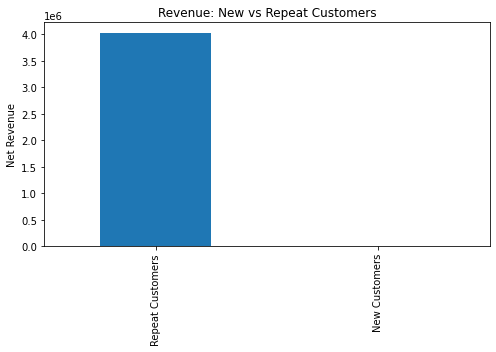

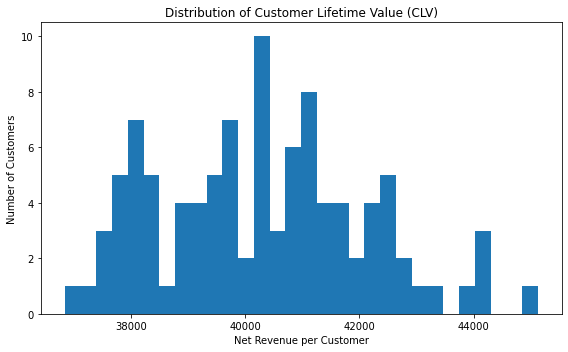

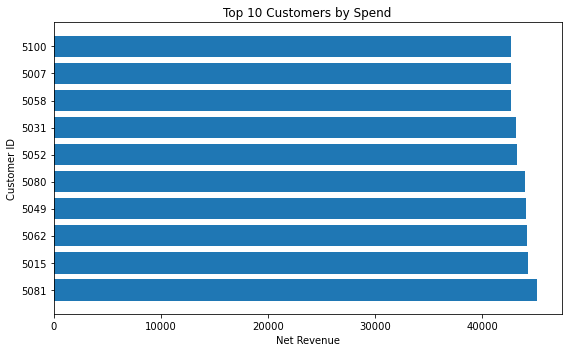

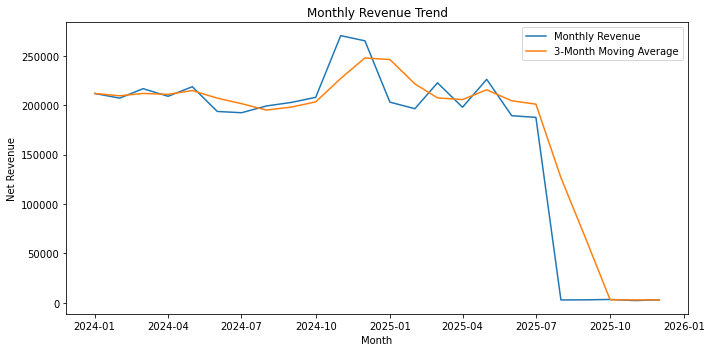

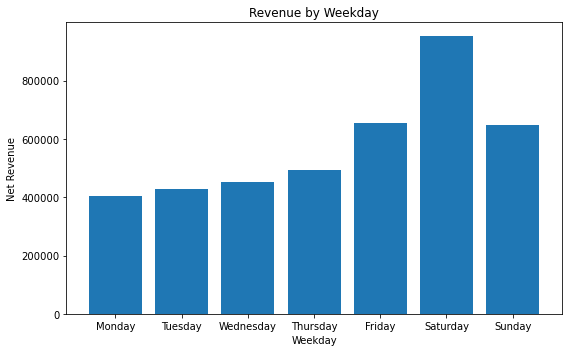

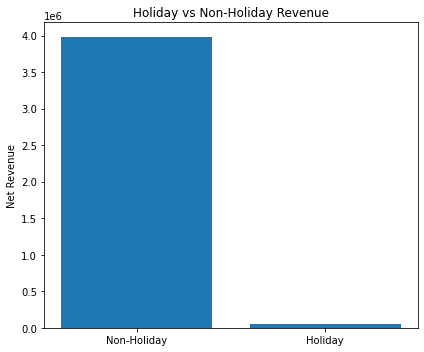

Saved figures to ./output/: ['fig_new_vs_repeat.png', 'fig_top10_customers.png', 'fig_weekday_revenue.png', 'fig_clv_hist.png', 'fig_holiday_vs_non.png', 'fig_monthly_revenue.png']


In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt

os.makedirs("output", exist_ok=True)

# We'll use sales_enriched for context columns (category, product_name, is_holiday, order_date, etc.)
if 'sales_enriched' not in globals():
    raise RuntimeError("sales_enriched is missing. Run the cleaning & join section first.")

# Ensure order_date is datetime and exists
sales_enriched['order_date'] = pd.to_datetime(sales_enriched['order_date'], errors='coerce')

#  Recompute core aggregates

# 1) Customer revenue (for CLV and top customers)
customer_revenue = (sales_enriched
                    .groupby('customer_id')['net_revenue']
                    .sum()
                    .reset_index()
                    .rename(columns={'net_revenue':'customer_total'}))

# 2) New vs Repeat revenue at the ORDER level (more accurate than line level)
#    - Aggregate to orders, attach customer_id & order_date
order_df = (sales_enriched
            .groupby(['order_id','customer_id'])[['net_revenue','order_date']]
            .agg({'net_revenue':'sum','order_date':'min'})
            .reset_index())

#    - Mark each customer's first order as "new", others as "repeat"
order_df = order_df.sort_values(['customer_id','order_date'])
first_order_idx = order_df.groupby('customer_id').head(1).index
order_df['is_new_customer'] = 0
order_df.loc[first_order_idx, 'is_new_customer'] = 1

new_vs_repeat = (order_df
                 .groupby('is_new_customer')['net_revenue']
                 .sum()
                 .rename(index={0:'Repeat Customers', 1:'New Customers'}))

# 3) Monthly revenue time series (Month Start, MS)
monthly_revenue = (sales_enriched
                   .set_index('order_date')
                   .resample('MS')['net_revenue']
                   .sum())

# 4) Weekday revenue (ordered Monday→Sunday)
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_revenue = (sales_enriched
                   .assign(weekday=sales_enriched['order_date'].dt.day_name())
                   .groupby('weekday')['net_revenue']
                   .sum()
                   .reindex(weekday_order))

# 5) Holiday vs Non-Holiday revenue
holiday_vs_non = (sales_enriched
                  .groupby('is_holiday')['net_revenue']
                  .sum()
                  .rename(index={0:'Non-Holiday', 1:'Holiday'}))

# 6) Top 10 customers by spend
top_customers = (customer_revenue
                 .sort_values('customer_total', ascending=False)
                 .head(10))

# PLOTS

# A) New vs Repeat Customers (Bar)
plt.figure(figsize=(7,5))
new_vs_repeat.plot(kind='bar')
plt.title("Revenue: New vs Repeat Customers")
plt.ylabel("Net Revenue")
plt.xlabel("")
plt.tight_layout()
plt.savefig("output/fig_new_vs_repeat.png", dpi=150)
plt.show()

# B) CLV Distribution (Histogram)
plt.figure(figsize=(8,5))
plt.hist(customer_revenue['customer_total'].values, bins=30)
plt.title("Distribution of Customer Lifetime Value (CLV)")
plt.xlabel("Net Revenue per Customer")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.savefig("output/fig_clv_hist.png", dpi=150)
plt.show()

# C) Top 10 Customers (Horizontal Bar)
plt.figure(figsize=(8,5))
plt.barh(top_customers['customer_id'].astype(str), top_customers['customer_total'].values)
plt.title("Top 10 Customers by Spend")
plt.xlabel("Net Revenue")
plt.ylabel("Customer ID")
plt.tight_layout()
plt.savefig("output/fig_top10_customers.png", dpi=150)
plt.show()

# D) Monthly Revenue Trend (Line) with 3‑month Moving Average
ma3 = monthly_revenue.rolling(window=3, min_periods=1).mean()
plt.figure(figsize=(10,5))
plt.plot(monthly_revenue.index, monthly_revenue.values, label="Monthly Revenue")
plt.plot(ma3.index, ma3.values, label="3-Month Moving Average")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Net Revenue")
plt.legend()
plt.tight_layout()
plt.savefig("output/fig_monthly_revenue.png", dpi=150)
plt.show()

# E) Weekday Revenue (Bar)
plt.figure(figsize=(8,5))
plt.bar(weekday_revenue.index, weekday_revenue.values)
plt.title("Revenue by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Net Revenue")
plt.tight_layout()
plt.savefig("output/fig_weekday_revenue.png", dpi=150)
plt.show()

# F) Holiday vs Non-Holiday (Bar)
plt.figure(figsize=(6,5))
plt.bar(holiday_vs_non.index, holiday_vs_non.values)
plt.title("Holiday vs Non-Holiday Revenue")
plt.xlabel("")
plt.ylabel("Net Revenue")
plt.tight_layout()
plt.savefig("output/fig_holiday_vs_non.png", dpi=150)
plt.show()

print("Saved figures to ./output/:",
      [f for f in os.listdir('output') if f.endswith('.png')])

### Visualisation Summary

- **New vs Repeat:** Confirms that most revenue is driven by repeat customers. This supports a retention-first strategy.
- **CLV Distribution:** Customer value is unevenly distributed; a subset of customers contributes a large share of revenue.
- **Top Customers:** Top 10 customers are high‑value and suitable for VIP/loyalty targeting.
- **Monthly Trend:** The 3‑month moving average smooths volatility and reveals overall growth/seasonality patterns.
- **Weekday Pattern:** Highlights best days for staffing and promotions.
- **Holiday Effect:** Compares holiday vs non‑holiday revenue to plan campaigns and stock accordingly.


# Executive Summary & Key Insights

## Project Overview
This project demonstrates my ability to clean, analyze, and visualize **retail sales data** using Python.  
I worked with multiple datasets (**Sales, Products, Customers, Stores, Holidays**), performed **data inspection and cleaning**, created enriched datasets, and produced actionable business insights.  

**Deliverables:**
- A fully documented Jupyter Notebook with code, explanations, and visuals  
- Exported charts (PNG) in the `output/` folder   

## Key Business Insights

### 1. Revenue Drivers  
- Repeat customers generate the majority of revenue → **retention is more profitable than acquisition**.  
- New customers still contribute significantly → balance acquisition campaigns with loyalty initiatives.  

### 2. Customer Lifetime Value (CLV)  
- CLV distribution is **highly skewed**.  
- Top 10 customers account for a disproportionately high share of sales → focus on **VIP programs, loyalty rewards, or premium bundles**.  

### 3. Sales Trends Over Time  
- Monthly revenue shows **seasonality and upward growth** (3-month moving average).  
- Insights can guide **inventory planning** and **staffing during peak demand**.  

### 4. Weekday Performance  
- Sales are not evenly distributed across weekdays.  
- Optimizing **promotions, restocking, and campaigns** on high-performing days could maximize returns.  

### 5. Holiday Impact  
- Revenue on **holidays vs non-holidays** shows significant differences.  
- Leverage this with **holiday-specific campaigns, discounts, or bundles**.  

# Forecast • Inventory • Promotions

### Daily / Weekly / Monthly Sales tables (for reporting)

In [34]:
# 7.1) Daily / Weekly / Monthly Sales Tables

import pandas as pd
import os

os.makedirs("output_planning", exist_ok=True)

# Safety: make sure order_date is datetime
sales_enriched["order_date"] = pd.to_datetime(sales_enriched["order_date"], errors="coerce")

# --- DAILY (last 30 days) ---
daily_sales = (sales_enriched
               .set_index("order_date")
               .groupby(pd.Grouper(freq="D"))[["net_revenue","qty"]]
               .sum()
               .tail(30))

# --- WEEKLY (last 12 weeks; weeks start Monday) ---
weekly_sales = (sales_enriched
                .set_index("order_date")
                .groupby(pd.Grouper(freq="W-MON"))[["net_revenue","qty"]]
                .sum()
                .tail(12))

# --- MONTHLY (full range; month start) ---
monthly_sales = (sales_enriched
                 .set_index("order_date")
                 .groupby(pd.Grouper(freq="MS"))[["net_revenue","qty"]]
                 .sum())

# --- CATEGORY MIX for the LAST FULL MONTH ---
max_date = sales_enriched["order_date"].max()

# current month start (first day of the month that max_date is in)
current_month_start = max_date.to_period("M").to_timestamp()         # e.g., 2025-08-01 00:00:00

# last full month start (one month before current month)
last_month_start = (max_date.to_period("M") - 1).to_timestamp()      # e.g., 2025-07-01 00:00:00

# Filter: last full month = [last_month_start, current_month_start)
mask_last_month = (sales_enriched["order_date"] >= last_month_start) & \
                  (sales_enriched["order_date"] <  current_month_start)

category_last_month = (sales_enriched.loc[mask_last_month]
                       .groupby("category")[["net_revenue","qty"]]
                       .sum()
                       .sort_values("net_revenue", ascending=False))

# Quick previews
print("=== Daily (last 30 days) ===")
display(daily_sales.tail(10))
print("\n=== Weekly (last 12 weeks) ===")
display(weekly_sales.tail(5))
print("\n=== Monthly (full range) ===")
display(monthly_sales.tail(6))
print("\n=== Category Mix (last full month) ===")
display(category_last_month)

# Save CSVs for reporting / Excel step
daily_sales.to_csv("output_planning/daily_sales.csv")
weekly_sales.to_csv("output_planning/weekly_sales.csv")
monthly_sales.to_csv("output_planning/monthly_sales.csv")
category_last_month.to_csv("output_planning/category_last_month.csv")

print("\nSaved to ./output_planning/: daily_sales.csv, weekly_sales.csv, monthly_sales.csv, category_last_month.csv")

=== Daily (last 30 days) ===


,net_revenue,qty
order_date,,
2025-11-28,0.0000,0
2025-11-29,0.0000,0
2025-11-30,0.0000,0
2025-12-01,806.0700,15
2025-12-02,402.7500,9
2025-12-03,319.9905,7
2025-12-04,475.3035,9
2025-12-05,295.9820,7
2025-12-06,325.6685,6



=== Weekly (last 12 weeks) ===


,net_revenue,qty
order_date,,
2025-11-10,1054.9950,23
2025-11-17,0.0000,0
2025-11-24,0.0000,0
2025-12-01,806.0700,15
2025-12-08,2165.7595,47



=== Monthly (full range) ===


,net_revenue,qty
order_date,,
2025-07-01,187587.9075,3853
2025-08-01,2817.8770,56
2025-09-01,2927.2070,58
2025-10-01,3313.2350,70
2025-11-01,2204.9380,47
2025-12-01,2971.8295,62



=== Category Mix (last full month) ===


,net_revenue,qty
category,,
Skincare,1546.970,33
Haircare,360.734,8
Grooming,205.774,4
Bodycare,91.460,2



Saved to ./output_planning/: daily_sales.csv, weekly_sales.csv, monthly_sales.csv, category_last_month.csv


Daily / Weekly / Monthly: supports the role’s requirement to prepare and distribute recurring sales reports.
Category mix (last full month): shows what’s driving sales most recently, useful for S&OP and marketing.

### Inventory Status with flags (stock, OOS, low-stock)

In [35]:
# 7.2) Inventory Status (SOH) with Low-Stock / OOS Flags

import pandas as pd
import numpy as np
import os

os.makedirs("output_planning", exist_ok=True)

# --- Safety: order_date is datetime
sales_enriched["order_date"] = pd.to_datetime(sales_enriched["order_date"], errors="coerce")

# --- 0) Tiny templates if inventory inputs are missing
# Opening inventory per SKU
if "inv_open" not in globals():
    inv_open = (
        products_clean[["product_id","product_name","category","brand"]]
        .assign(opening_units=np.random.randint(200, 800, size=len(products_clean)))
    )

# Inbound POs (ETA and units)
if "inbound_pos" not in globals():
    inbound_pos = pd.DataFrame({
        "po_id": [f"PO{i}" for i in range(1, 11)],
        "product_id": np.random.choice(products_clean["product_id"], size=10, replace=True),
        "eta": pd.to_datetime(sales_enriched["order_date"].max()) + pd.to_timedelta(np.random.randint(0, 30, size=10), unit="D"),
        "inbound_units": np.random.randint(100, 500, size=10),
    })

# --- 1) Daily units sold per SKU
sku_daily_units = (
    sales_enriched.groupby(["product_id","order_date"])["qty"]
    .sum()
    .reset_index()
    .sort_values(["product_id","order_date"])
)

# Cumulative sold
sku_daily_units["cum_sold"] = sku_daily_units.groupby("product_id")["qty"].cumsum()

# --- 2) Inbound daily (collapse POs onto their ETA dates)
inbound_pos["eta"] = pd.to_datetime(inbound_pos["eta"], errors="coerce")
inbound_daily = inbound_pos.rename(columns={"eta":"order_date"})[["product_id","order_date","inbound_units"]]
inbound_daily = inbound_daily.sort_values(["product_id","order_date"])

# Cumulative inbound per SKU
inbound_daily["cum_inbound"] = inbound_daily.groupby("product_id")["inbound_units"].cumsum()

# --- 3) Build Inventory Status as of latest sales date
latest_date = sales_enriched["order_date"].max()

# latest cumulative sold per SKU up to latest_date
last_cum_sold = (
    sku_daily_units[sku_daily_units["order_date"] <= latest_date]
    .groupby("product_id").tail(1)[["product_id","cum_sold"]]
    .rename(columns={"cum_sold":"cum_sold_to_date"})
)

# latest cumulative inbound per SKU up to latest_date
last_cum_in = (
    inbound_daily[inbound_daily["order_date"] <= latest_date]
    .groupby("product_id").tail(1)[["product_id","cum_inbound"]]
    .rename(columns={"cum_inbound":"cum_inbound_to_date"})
)

# Join pieces
inv_status = (
    products_clean[["product_id","product_name","category","brand"]]
    .merge(inv_open[["product_id","opening_units"]], on="product_id", how="left")
    .merge(last_cum_sold, on="product_id", how="left")
    .merge(last_cum_in, on="product_id", how="left")
)

# Fill missing with 0
inv_status[["opening_units","cum_sold_to_date","cum_inbound_to_date"]] = \
    inv_status[["opening_units","cum_sold_to_date","cum_inbound_to_date"]].fillna(0)

# Compute Stock On Hand (SOH)
inv_status["soh_units"] = inv_status["opening_units"] + inv_status["cum_inbound_to_date"] - inv_status["cum_sold_to_date"]

# Flags (tune thresholds as needed)
LOW_STOCK_THRESHOLD = 50
inv_status["low_stock_flag"] = (inv_status["soh_units"] <= LOW_STOCK_THRESHOLD).astype(int)
inv_status["oos_flag"]       = (inv_status["soh_units"] <= 0).astype(int)

# Sort by lowest stock first for quick attention list
inv_status = inv_status.sort_values(["soh_units","product_id"])

# Preview and save
display(inv_status.head(15))
inv_status.to_csv("output_planning/inventory_status.csv", index=False)
print("Saved: output_planning/inventory_status.csv")

,product_id,product_name,category,brand,opening_units,cum_sold_to_date,cum_inbound_to_date,soh_units,low_stock_flag,oos_flag
4,1005,Hyaluronic Acid 2% 30ml,Skincare,Dermaglow,251,3287,0.0,-3036.0,1,1
22,1023,AHA Serum 30ml,Skincare,Dermaglow,226,3210,0.0,-2984.0,1,1
2,1003,Retinol Cream 50ml,Skincare,Dermaglow,223,3148,0.0,-2925.0,1,1
20,1021,Exfoliating Toner 200ml,Skincare,Dermaglow,259,3182,0.0,-2923.0,1,1
18,1019,Beard Oil 30ml,Grooming,Groompro,443,3350,0.0,-2907.0,1,1
10,1011,Lip Balm 10g,Skincare,Dermaglow,207,3102,0.0,-2895.0,1,1
14,1015,Hand Cream 50ml,Bodycare,Bodysoft,396,3216,0.0,-2820.0,1,1
11,1012,Clay Mask 75ml,Skincare,Pureclean,370,3142,0.0,-2772.0,1,1
23,1024,Moisturizer Gel 50ml,Skincare,Dermaglow,446,3204,0.0,-2758.0,1,1
25,1026,Ceramide Moisturizer 50ml,Skincare,Dermaglow,511,3249,0.0,-2738.0,1,1


Saved: output_planning/inventory_status.csv


Computes Stock On Hand (SOH) per SKU using: Opening + Inbound − Cumulative Sales.
Flags low stock and out‑of‑stock items so planners can act quickly.
Mirrors daily inventory reporting in eCom planning.

### Forecast vs Actual + Accuracy (MAPE, Bias)

In [37]:
# 7.3) Forecast vs Actual Sales with MAPE and Bias

import numpy as np

# --- 0) Create simple forecast template if missing
# Example: last 3 months average by SKU as forecast for latest month in data
if "forecast_df" not in globals():
    sales_enriched["month"] = sales_enriched["order_date"].dt.to_period("M")

    hist_monthly = (sales_enriched
                    .groupby(["product_id","month"])["qty"]
                    .sum()
                    .reset_index())

    # Ensure proper ordering so .tail(3) grabs the latest 3 months per SKU
    hist_monthly = hist_monthly.sort_values(["product_id","month"])

    # Grab last 3 months per product_id, then average qty
    last3 = hist_monthly.groupby("product_id").tail(3)
    forecast_df = (last3
                   .groupby("product_id", as_index=False)["qty"]
                   .mean()
                   .rename(columns={"qty":"forecast_qty"}))

    # Forecast for the latest month in the dataset
    latest_month = sales_enriched["month"].max()
    forecast_df["month"] = latest_month

# --- 1) Actual sales by SKU for the forecast month
actual_df = (sales_enriched
             .groupby(["product_id","month"])["qty"]
             .sum()
             .reset_index())

actual_df = actual_df[actual_df["month"] == forecast_df["month"].iloc[0]]

# --- 2) Join forecast with actual
fc_compare = (forecast_df
              .merge(actual_df, on=["product_id","month"], how="left")
              .merge(products_clean[["product_id","product_name","category","brand"]],
                     on="product_id", how="left"))

fc_compare["actual_qty"] = fc_compare["qty"].fillna(0)
fc_compare = fc_compare.drop(columns=["qty"])

# --- 3) Error metrics
fc_compare["error"] = fc_compare["forecast_qty"] - fc_compare["actual_qty"]
fc_compare["abs_perc_error"] = np.where(
    fc_compare["actual_qty"] > 0,
    (fc_compare["error"]).abs() / fc_compare["actual_qty"] * 100,
    np.nan
)

mape = fc_compare["abs_perc_error"].mean()
bias = fc_compare["error"].mean()

# --- 4) Save outputs
fc_compare = fc_compare.sort_values("abs_perc_error", ascending=False)

display(fc_compare.head(15))
print(f"MAPE (mean abs % error): {mape:.2f}%")
print(f"Bias (positive=over-forecast, negative=under-forecast): {bias:.2f} units")

fc_compare.to_csv("output_planning/forecast_vs_actual.csv", index=False)
print("Saved: output_planning/forecast_vs_actual.csv")

,product_id,forecast_qty,month,product_name,category,brand,actual_qty,error,abs_perc_error
7,1008,48.333333,2025-12,Foaming Cleanser 200ml,Skincare,Pureclean,2.0,46.333333,2316.666667
15,1016,4.333333,2025-12,Shampoo 300ml,Haircare,Hairlux,1.0,3.333333,333.333333
4,1005,4.000000,2025-12,Hyaluronic Acid 2% 30ml,Skincare,Dermaglow,1.0,3.000000,300.000000
9,1010,2.333333,2025-12,Eye Cream 15ml,Skincare,Dermaglow,1.0,1.333333,133.333333
2,1003,2.333333,2025-12,Retinol Cream 50ml,Skincare,Dermaglow,1.0,1.333333,133.333333
11,1012,4.333333,2025-12,Clay Mask 75ml,Skincare,Pureclean,2.0,2.333333,116.666667
18,1019,2.000000,2025-12,Beard Oil 30ml,Grooming,Groompro,1.0,1.000000,100.000000
8,1009,0.666667,2025-12,Micellar Water 400ml,Skincare,Pureclean,2.0,-1.333333,66.666667
6,1007,4.666667,2025-12,Cleansing Balm 90g,Skincare,Pureclean,3.0,1.666667,55.555556
24,1025,3.000000,2025-12,Night Repair Cream 50ml,Skincare,Dermaglow,2.0,1.000000,50.000000


MAPE (mean abs % error): 170.86%
Bias (positive=over-forecast, negative=under-forecast): 6.40 units
Saved: output_planning/forecast_vs_actual.csv


Why this matters

- Compares forecast vs actual sales per SKU.
- Computes MAPE (accuracy %) and Bias (over vs under forecasting), key S&OP metrics.
- Identifies SKUs with biggest forecast errors for planners to investigate.

### OOS Tracker with ETAs

In [38]:
# 7.4) Out-of-Stock Tracker with ETAs (+ Low-stock attention list)

import pandas as pd
import numpy as np
import os

os.makedirs("output_planning", exist_ok=True)

# Safety
inbound_pos["eta"] = pd.to_datetime(inbound_pos["eta"], errors="coerce")

# --- 1) Next inbound per SKU (soonest ETA > today or > latest sales date)
today_anchor = max(pd.Timestamp("today").normalize(), sales_enriched["order_date"].max().normalize())

next_inbound = (inbound_pos[inbound_pos["eta"] >= today_anchor]
                .sort_values(["product_id", "eta"])
                .groupby("product_id", as_index=False)
                .first()[["product_id", "eta", "inbound_units"]]
                .rename(columns={"eta": "next_eta", "inbound_units": "next_eta_units"}))

# --- 2) Join with current inventory status (built in Step 2)
inv_cols = ["product_id","product_name","category","brand","soh_units","low_stock_flag","oos_flag"]
inv_now = inv_status[inv_cols].copy()

oos_tracker = (inv_now
               .merge(next_inbound, on="product_id", how="left")
               .sort_values(["oos_flag","low_stock_flag","soh_units"], ascending=[False, False, True]))

# Days until ETA (if we have an ETA)
oos_tracker["days_to_eta"] = (oos_tracker["next_eta"] - today_anchor).dt.days

# Simple recommended action (you can tune rules)
def action_row(r):
    if r["oos_flag"] == 1:
        if pd.notna(r["next_eta"]):
            return "OOS: Expedite inbound / Pull forward PO / Rebalance store stock"
        else:
            return "OOS: Raise urgent PO / consider delist temp / reduce site visibility"
    if r["low_stock_flag"] == 1:
        return "Low stock: throttle promo / reduce samples / check safety stock"
    return "Healthy"

oos_tracker["recommended_action"] = oos_tracker.apply(action_row, axis=1)

# Split views
oos_only        = oos_tracker[oos_tracker["oos_flag"] == 1].copy()
low_stock_only  = oos_tracker[(oos_tracker["oos_flag"] == 0) & (oos_tracker["low_stock_flag"] == 1)].copy()

# Preview
print("=== OOS ===")
display(oos_only.head(10))
print("\n=== Low Stock ===")
display(low_stock_only.head(10))

# Save
oos_only.to_csv("output_planning/oos_tracker.csv", index=False)
low_stock_only.to_csv("output_planning/low_stock_tracker.csv", index=False)
oos_tracker.to_csv("output_planning/inventory_attention_all.csv", index=False)

print("\nSaved:")
print(" - output_planning/oos_tracker.csv")
print(" - output_planning/low_stock_tracker.csv")
print(" - output_planning/inventory_attention_all.csv")

=== OOS ===


,product_id,product_name,category,brand,soh_units,low_stock_flag,oos_flag,next_eta,next_eta_units,days_to_eta,recommended_action
0,1005,Hyaluronic Acid 2% 30ml,Skincare,Dermaglow,-3036.0,1,1,NaT,NaN,NaN,OOS: Raise urgent PO / consider delist temp / ...
1,1023,AHA Serum 30ml,Skincare,Dermaglow,-2984.0,1,1,NaT,NaN,NaN,OOS: Raise urgent PO / consider delist temp / ...
2,1003,Retinol Cream 50ml,Skincare,Dermaglow,-2925.0,1,1,NaT,NaN,NaN,OOS: Raise urgent PO / consider delist temp / ...
3,1021,Exfoliating Toner 200ml,Skincare,Dermaglow,-2923.0,1,1,NaT,NaN,NaN,OOS: Raise urgent PO / consider delist temp / ...
4,1019,Beard Oil 30ml,Grooming,Groompro,-2907.0,1,1,NaT,NaN,NaN,OOS: Raise urgent PO / consider delist temp / ...
5,1011,Lip Balm 10g,Skincare,Dermaglow,-2895.0,1,1,NaT,NaN,NaN,OOS: Raise urgent PO / consider delist temp / ...
6,1015,Hand Cream 50ml,Bodycare,Bodysoft,-2820.0,1,1,2026-01-02,332.0,26.0,OOS: Expedite inbound / Pull forward PO / Reba...
7,1012,Clay Mask 75ml,Skincare,Pureclean,-2772.0,1,1,NaT,NaN,NaN,OOS: Raise urgent PO / consider delist temp / ...
8,1024,Moisturizer Gel 50ml,Skincare,Dermaglow,-2758.0,1,1,2026-01-02,228.0,26.0,OOS: Expedite inbound / Pull forward PO / Reba...
9,1026,Ceramide Moisturizer 50ml,Skincare,Dermaglow,-2738.0,1,1,NaT,NaN,NaN,OOS: Raise urgent PO / consider delist temp / ...



=== Low Stock ===


,product_id,product_name,category,brand,soh_units,low_stock_flag,oos_flag,next_eta,next_eta_units,days_to_eta,recommended_action



Saved:
 - output_planning/oos_tracker.csv
 - output_planning/low_stock_tracker.csv
 - output_planning/inventory_attention_all.csv


- Creates an Out‑of‑Stock tracker with next inbound ETA and days to ETA.
- Adds recommended actions for planners (expedite, throttle promo, etc.).
- Also saves a Low‑stock list for proactive follow‑up.

In [40]:
# 7.5) Build the Planning Excel Pack (one workbook, many tabs)

import os
import pandas as pd
import numpy as np

os.makedirs("output_planning", exist_ok=True)
excel_path = "output_planning/retail_data.xlsx"

# ---------- Inputs assembled earlier ----------
# sales_flash_daily      (from Step 1)
# inv_status             (from Step 2)
# fc_compare             (from Step 3)
# oos_only, low_stock_only, oos_tracker (from Step 4)
# monthly_revenue, weekday_revenue, new_vs_repeat, customer_revenue (from your viz section)

# Fallbacks (in case a cell was skipped)
def _safe(name, obj):
    if name not in globals():
        globals()[name] = obj

_safe("sales_flash_daily", pd.DataFrame())
_safe("inv_status", pd.DataFrame())
_safe("fc_compare", pd.DataFrame())
_safe("oos_only", pd.DataFrame())
_safe("low_stock_only", pd.DataFrame())
_safe("oos_tracker", pd.DataFrame())

# Convert series to DataFrame for Excel tabs
def series_to_df(s, index_name, value_name):
    if isinstance(s, pd.Series):
        return s.reset_index().rename(columns={s.index.name or index_name:index_name, s.name or value_name:value_name})
    return s

monthly_rev_df   = series_to_df(monthly_revenue, "month", "net_revenue") if 'monthly_revenue' in globals() else pd.DataFrame()
weekday_rev_df   = series_to_df(weekday_revenue, "weekday", "net_revenue") if 'weekday_revenue' in globals() else pd.DataFrame()
new_vs_repeat_df = series_to_df(new_vs_repeat, "segment", "net_revenue") if 'new_vs_repeat' in globals() else pd.DataFrame()

# KPI snapshot for cover sheet (simple, fast)
kpi_rows = []

if 'sales_enriched' in globals():
    total_revenue = sales_enriched["net_revenue"].sum()
    kpi_rows.append(["Total Revenue", f"{total_revenue:,.0f}"])
    kpi_rows.append(["Total Orders",  f"{sales_enriched['order_id'].nunique():,}"])
    kpi_rows.append(["Total Units",   f"{sales_enriched['qty'].sum():,}"])

if not customer_revenue.empty:
    kpi_rows.append(["Avg CLV (revenue/customer)", f"{customer_revenue['customer_total'].mean():,.0f}"])

if not fc_compare.empty and "abs_perc_error" in fc_compare:
    kpi_rows.append(["Forecast MAPE (%)", f"{fc_compare['abs_perc_error'].mean():.2f}%"])

if not oos_tracker.empty:
    kpi_rows.append(["# OOS SKUs", int((oos_tracker["oos_flag"]==1).sum())])
    kpi_rows.append(["# Low‑stock SKUs", int(((oos_tracker["oos_flag"]==0)&(oos_tracker["low_stock_flag"]==1)).sum())])

cover_df = pd.DataFrame(kpi_rows, columns=["Metric","Value"])

with pd.ExcelWriter(excel_path, engine="xlsxwriter", datetime_format="yyyy-mm-dd") as writer:
    # Cover
    cover_df.to_excel(writer, sheet_name="00_Cover", index=False)
    ws = writer.sheets["00_Cover"]
    ws.write(0, 0, "Metric")
    ws.write(0, 1, "Value")
    ws.set_column(0, 0, 36)
    ws.set_column(1, 1, 28)
    ws.write(10, 0, "Notes")
    ws.write(11, 0, "• This workbook is auto‑generated from the Retail Data Analysis project.")
    ws.write(12, 0, "• Tabs mirror daily sales flash, inventory status, forecast accuracy, and OOS tracking.")

    # Sales Flash (daily)
    sales_flash_daily.to_excel(writer, sheet_name="01_Sales_Flash_Daily", index=False)

    # Trends / Segments
    monthly_rev_df.to_excel(writer, sheet_name="02_Monthly_Revenue", index=False)
    weekday_rev_df.to_excel(writer, sheet_name="03_Weekday_Revenue", index=False)
    new_vs_repeat_df.to_excel(writer, sheet_name="04_New_vs_Repeat", index=False)

    # Inventory
    inv_status.to_excel(writer, sheet_name="05_Inventory_Status", index=False)
    oos_only.to_excel(writer, sheet_name="06_OOS", index=False)
    low_stock_only.to_excel(writer, sheet_name="07_Low_Stock", index=False)

    # Forecast vs Actual
    fc_compare.to_excel(writer, sheet_name="08_Forecast_vs_Actual", index=False)

    # Attention list (combined)
    oos_tracker.to_excel(writer, sheet_name="09_Inventory_Attention", index=False)

print(f"Saved Excel pack → {excel_path}")

Saved Excel pack → output_planning/retail_data.xlsx
